In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
train = pd.read_csv('../Train/train_set_geo_level_sum_base.csv')

train.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,geo_level_1_id_sum,geo_level_2_id_sum,geo_level_3_id_sum,base_percentage,damage_grade
0,6,487,12198,2,30,6,5,1,1,0,...,0,0,0,0,1,24381,270,37,1.200000,3
1,8,900,2812,2,10,8,7,0,1,0,...,0,0,0,0,1,19080,199,16,1.142857,2
2,21,363,8973,2,10,5,5,0,1,0,...,0,0,0,0,1,14889,1760,136,1.000000,3
3,22,418,10694,2,10,6,5,0,1,0,...,1,0,0,0,1,6252,205,31,1.200000,2
4,11,131,1488,3,30,8,9,1,0,0,...,0,0,0,0,1,8220,1038,122,0.888889,3


In [4]:
X, y = train.iloc[:,:-1], train.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [5]:
cat = CatBoostClassifier(silent=True, random_seed=123)
cat.fit(X_train, y_train)

preds = cat.predict(X_test)
f1 = f1_score(y_test, preds, average='micro')
print("F1-Mean Score: %f" % (f1))

F1-Mean Score: 0.730051


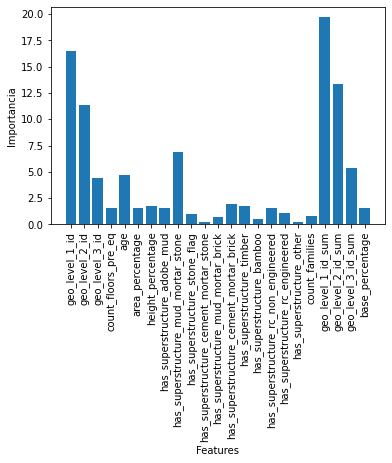

In [6]:
plt.bar(X_train.columns, cat.feature_importances_)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.show()

## Test

In [8]:
test = pd.read_csv('../Test/test_set_geo_level_sum_base.csv')

test.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,geo_level_1_id_sum,geo_level_2_id_sum,geo_level_3_id_sum,base_percentage
0,300051,17,596,11307,3,20,7,6,0,1,...,0,0,0,0,0,1,7452,45,4,1.166667
1,99355,6,141,11987,2,25,13,5,0,1,...,0,0,0,0,0,1,8104,65,3,2.600000
2,890251,22,19,10044,2,5,4,5,0,1,...,0,0,0,0,0,1,2106,17,4,0.800000
3,745817,26,39,633,1,0,19,3,0,0,...,0,0,0,0,0,2,7387,1329,190,6.333333
4,421793,17,289,7970,3,15,8,7,0,1,...,0,0,0,0,0,1,7452,62,7,1.142857


In [9]:
ids = test['building_id']

test.drop('building_id', axis='columns', inplace=True)

test.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,geo_level_1_id_sum,geo_level_2_id_sum,geo_level_3_id_sum,base_percentage
0,17,596,11307,3,20,7,6,0,1,0,...,0,0,0,0,0,1,7452,45,4,1.166667
1,6,141,11987,2,25,13,5,0,1,0,...,0,0,0,0,0,1,8104,65,3,2.600000
2,22,19,10044,2,5,4,5,0,1,0,...,0,0,0,0,0,1,2106,17,4,0.800000
3,26,39,633,1,0,19,3,0,0,0,...,0,0,0,0,0,2,7387,1329,190,6.333333
4,17,289,7970,3,15,8,7,0,1,0,...,0,0,0,0,0,1,7452,62,7,1.142857


In [10]:
preds = cat.predict(test)

In [17]:
test['damage_grade'] = preds
test['building_id'] = ids

result = test[['building_id', 'damage_grade']]

result.head()

,building_id,damage_grade
0,300051,3
1,99355,2
2,890251,2
3,745817,2
4,421793,3


In [18]:
result.to_csv('../preds_cat_v3.csv', index=False)